In [1]:
import numpy as np
import time
import numpy as np
import matplotlib.pyplot as plt
#import matplotlib.colors as colors
#import matplotlib.cm as cmx
from scipy import optimize, stats
import bluepyopt as bpop
import curve_fitting as cf
import bluepyopt.deapext.algorithms as algo
import generalized_genSim_shorten_time as ggsd
import vclamp_evaluator_HMM as vcl_ev
import pickle
import time
from deap import tools
#from deap import base, creator
import multiprocessing
import eval_helper_na16 as eh16
#import eval_helper as eh
#import scoring_functions_relative as sf
#import curve_fitting as cf

In [2]:
par11 = [12.736161095498469, -34.54622996174131, 8.900740222153356, 0.47113953995972874, 0.12769067385859378, -44.29455370612965, -46.16743615233736, 0.46303558430016944, 0.9933132196518781, 0.02061509817874656, 0.00923614306106133, 2.989060938752174, 0.010090574179536292, 0.030929890657572654, -42.38934340146812, 13.721957738090566, -63.634059870601924, 0.0003751671632243489, 12.725782871654546, 0.1622502914624947, 10.030324882064976, -59.43181236396654, 2.2839397135144353, 50.0084471794889]
par12 = [12.736161095498469, -34.54622996174131, 8.900740222153356, 0.47113953995972874, 0.12769067385859378, -44.29455370612965, -46.16743615233736, 0.46303558430016944, 0.9933132196518781, 0.02061509817874656, 0.00923614306106133, 2.989060938752174, 0.010090574179536292, 0.030929890657572654, -42.38934340146812, 13.721957738090566, -63.634059870601924, 0.0003751671632243489, 12.725782871654546, 0.1622502914624947, 10.030324882064976, -59.43181236396654, 2.2839397135144353, 50.0084471794889]
par13 = [12.736161095498469, -34.54622996174131, 8.900740222153356, 0.47113953995972874, 0.12769067385859378, -44.29455370612965, -46.16743615233736, 0.46303558430016944, 0.9933132196518781, 0.02061509817874656, 0.00923614306106133, 2.989060938752174, 0.010090574179536292, 0.030929890657572654, -42.38934340146812, 13.721957738090566, -63.634059870601924, 0.0003751671632243489, 12.725782871654546, 0.1622502914624947, 10.030324882064976, -59.43181236396654, 2.2839397135144353, 50.0084471794889]
par14 = [12.736161095498469, -34.54622996174131, 8.900740222153356, 0.47113953995972874, 0.12769067385859378, -44.29455370612965, -46.16743615233736, 0.46303558430016944, 0.9933132196518781, 0.02061509817874656, 0.00923614306106133, 2.989060938752174, 0.010090574179536292, 0.030929890657572654, -42.38934340146812, 13.721957738090566, -63.634059870601924, 0.0003751671632243489, 12.725782871654546, 0.1622502914624947, 10.030324882064976, -59.43181236396654, 2.2839397135144353, 50.0084471794889]

In [3]:
par21 = [10.06690313251521, -31.562073777553422, 3.9297723293240256, 0.4798786623305549, 0.12622452060897638, -46.83470845758933, -45.68234377107592, 0.8211947451257695, 2.5171769008446914, 0.019379801736362865, 0.010251773010675959, 0.6625181100086306, 0.01094609966247002, 0.02988715311261167, -40.86854994796716, 11.14660237026133, -58.937400956043916, 0.00026789281410519915, 12.265923229048832, 0.12772394832739714, 6.380979932387934, -55.8425023376434, 0.6108976833344886, 57.513763114866315]
par22 = [11.20006100848342, -32.267737323039604, 4.070372186606046, 0.42495312869587776, 0.1265328066673459, -46.817546325177865, -48.842888528691084, 0.8922991433505162, 1.6685081616001012, 0.019487884980334446, 0.010481500854405449, 3.553390133579808, 0.009420335770582839, 0.02949393902477238, -41.33416919339728, 6.174265637288129, -60.97044697073535, 0.00022264036828422326, 7.118670146073957, 0.25319220014701693, 13.465377718738697, -60.91186068336202, 5.989191927484982, 51.3843028663016]
par23 = [10.165473947229993, -31.05208619799176, 4.334052677427112, 0.3493663608362806, 0.12243056221468192, -42.13852287213427, -42.669616042896216, 0.8211947451257695, 0.9746499539065133, 0.02081859907776471, 0.010579674091249559, 2.5426515398373195, 0.010919278896009604, 0.02960542303330072, -40.98993821285139, 13.895209969000064, -58.95260476559965, 0.00023151032030107013, 13.579837168386357, 0.15240544974561182, 11.435901555380058, -55.8425023376434, 0.6108976833344886, 59.59659122495481]
par24 = [12.99747380739703, -31.256142380866017, 3.7597942702790443, 0.35876130010761864, 0.12796491516472458, -46.9861091280831, -46.778446117117284, 0.9885248463409279, 2.914968471932119, 0.019278252318042942, 0.010467541400328479, 3.3762874069281996, 0.010171907926490618, 0.0303907763079414, -40.03233261320854, 13.636089883151987, -55.28792471803719, 0.00040169709512705696, 16.238870307543642, 0.20967218529708684, 5.782226096571499, -55.7082308632324, 6.072534663013338, 59.99522235636227]
par25 = [12.99747380739703, -31.256142380866017, 3.7597942702790443, 0.35876130010761864, 0.12796491516472458, -46.9861091280831, -46.778446117117284, 0.9885248463409279, 2.914968471932119, 0.019278252318042942, 0.010467541400328479, 3.3762874069281996, 0.010171907926490618, 0.0303907763079414, -40.03233261320854, 13.636089883151987, -55.28792471803719, 0.00040169709512705696, 16.238870307543642, 0.20967218529708684, 5.782226096571499, -55.7082308632324, 6.072534663013338, 59.99522235636227]
par26 = [12.99747380739703, -31.256142380866017, 3.7597942702790443, 0.35876130010761864, 0.12796491516472458, -46.9861091280831, -46.778446117117284, 0.9885248463409279, 2.914968471932119, 0.019278252318042942, 0.010467541400328479, 3.3762874069281996, 0.010171907926490618, 0.0303907763079414, -40.03233261320854, 13.636089883151987, -55.28792471803719, 0.00040169709512705696, 16.238870307543642, 0.20967218529708684, 5.782226096571499, -55.7082308632324, 6.072534663013338, 59.99522235636227]
par27 = [12.74691177202391, -30.00280530854859, 3.913930172296677, 0.4197916465310711, 0.12340716344768672, -49.27535479302131, -44.50994704626202, 0.3224055061975786, 1.4685394959113576, 0.02088595874965679, 0.009912557558339627, 3.984891039243997, 0.00955486259463766, 0.030999822878700685, -40.00692153741563, 13.995642814445697, -62.230758539682704, 0.0003424269413788598, 16.999885492689693, 0.28333012609827285, 10.168778605810191, -57.91480270762592, 2.965918150881254, 59.018088045022566]
par28 = [12.74691177202391, -30.00280530854859, 3.913930172296677, 0.4197916465310711, 0.12340716344768672, -49.27535479302131, -44.50994704626202, 0.3224055061975786, 1.4685394959113576, 0.02088595874965679, 0.009912557558339627, 3.984891039243997, 0.00955486259463766, 0.030999822878700685, -40.00692153741563, 13.995642814445697, -62.230758539682704, 0.0003424269413788598, 16.999885492689693, 0.28333012609827285, 10.168778605810191, -57.91480270762592, 2.965918150881254, 59.018088045022566]

In [4]:
par31 = [12.380359346953513, -30.487710829945, 9.684968440119363, 0.3001034450747759, 0.12968847743279674, -40.8844590321768, -41.2728802060626, 0.2594294410954523, 2.6503514790047924, 0.02099348424467286, 0.010558633689206492, 3.5732106410229267, 0.00991150361537155, 0.02965885742560085, -41.202878952059926, 10.982263782777846, -55.08789963270741, 0.0005989783167389434, 15.293371310494214, 0.24895556429901922, 13.211035278156547, -56.96952860211244, 4.565656092048718, 57.79079217103686]

In [5]:

par31 = [11.04024123742671, -56.65201599102284, 14.776347464138215, 0.6164101522635151, 0.9527061677612155, -31.20658101519332, -64.63467299240811, 2.484608264139856, 1.054856204449557, 0.09462513796657021, 0.07545106025487065, 0.3314397944385272, 0.056244140533585354, 0.05460122267203567, -33.88670658375263, 56.855968203364625, -63.00768508672461, 0.05225792930305548, 1.1881043747351496, 0.9899639056478778, 82.1655667389854, -33.489816543114166, -15.229851722733267, 55.33760500219062]
par32 = [28.375881122652494, -50.286726235457174, 17.970829201822575, 0.9842074360524694, 0.9763735565770881, -16.233971058046514, -78.57574504556328, 5.9805857977893995, 0.8515801919080317, 0.08227544368977477, 0.056038898654170326, 0.4491723884670174, 0.00798288896269489, 0.07808054534377482, -14.371153130572274, 31.464309704031297, -67.82353723127922, 0.02999816133585996, 11.969325338416224, 0.8615127804536048, 19.428276607988415, -18.25909260416788, -19.83318481180694, 52.589775286028875]
par33 = [28.375881122652494, -50.286726235457174, 17.970829201822575, 0.9842074360524694, 0.9763735565770881, -16.233971058046514, -78.57574504556328, 5.9805857977893995, 0.8515801919080317, 0.08227544368977477, 0.056038898654170326, 0.4491723884670174, 0.00798288896269489, 0.07808054534377482, -14.371153130572274, 31.464309704031297, -67.82353723127922, 0.02999816133585996, 11.969325338416224, 0.8615127804536048, 19.428276607988415, -18.25909260416788, -19.83318481180694, 52.589775286028875]

In [6]:

par41 = [29.957471246156267, -52.094607599066144, 15.00867511196283, 0.9601302113149552, 0.9352916533289735, -16.270619994544795, -67.16916320200579, 8.581400135235594, 1.3551382032893953, 0.09720605115742402, 0.065171974565368, 0.03159580135533635, 0.01542790421999208, 0.05182947102047593, -39.44454202492248, 31.92672546609814, -76.30926054030948, 0.024372717571248214, 30.05538450201424, 0.754277089232621, 30.22713471436532, -18.110568506853557, -15.860594759684167, 53.42892846887146]
par42 = [29.957471246156267, -52.094607599066144, 15.00867511196283, 0.9601302113149552, 0.9352916533289735, -16.270619994544795, -67.16916320200579, 8.581400135235594, 1.3551382032893953, 0.09720605115742402, 0.065171974565368, 0.03159580135533635, 0.01542790421999208, 0.05182947102047593, -39.44454202492248, 31.92672546609814, -76.30926054030948, 0.024372717571248214, 30.05538450201424, 0.754277089232621, 30.22713471436532, -18.110568506853557, -15.860594759684167, 53.42892846887146]
par43 = [13.698081898591457, -93.94726865767441, 41.83643330004186, 0.867353964751016, 0.37562032970274156, -91.34421019299062, -90.48588954305637, 9.063323005727835, 1.1109006173645652, 0.06545472881293664, 0.008841975558987141, 5.123694794762023, 0.09120809131502004, 0.02421268298517609, -72.33643484204019, 43.183814229563176, -48.38725277325803, 0.03363552424400592, 20.209751008248688, 0.050485339563094055, 59.92825519195998, -75.09101292637916, 11.021198063467715, 54.378865004993195]

In [7]:
par51 = [9.225358923766304, -27.06014095699257, 6.533069832186314, 0.8318069094355278, 0.5448765922639782, -19.028150358805078, -65.06711285008222, 5.397289937726346, 4.169124718507854, 0.0523374436436805, 0.07514787808278445, 7.706332414408704, 0.09924559243185062, 0.0115827484625473, -20.08805893346075, 2.2355219422419097, -41.69911351967409, 0.026947904525390535, 19.91144461124012, 0.6408152167194541, 45.3536265525171, -30.24029603926057, -19.92633760612061, 50.412344420874774]
par52 = [9.98478924219683, -26.394821832084826, 15.102462186348392, 0.9927600119768021, 0.566676205835168, -20.49938799107719, -21.74529546601016, 3.474425948123114, 6.017343775103005, 0.05585290393466189, 0.09071763818305337, 0.7213500143987188, 0.0902514740910776, 0.006588154744114618, -36.16149112922678, 4.357925674496787, -57.332404275188, 0.03555715278354236, 33.14999387039228, 0.753947655571063, 25.601910161622556, -94.56359604089282, -17.488388474358164, 54.123847958694746]
par53 = [10.094413377538576, -26.394821832084826, 15.102462186348392, 0.9947948765268524, 0.5316385766610482, -37.50873814586143, -13.911965256097261, 4.275293752540246, 4.555898340312815, 0.05930919377663384, 0.08837058032248252, 0.94718228502838, 0.09818957172196256, 0.006588154744114618, -36.33903736830551, 4.357925674496787, -62.0304237519327, 0.03555715278354236, 34.454146235438685, 0.7634030907425414, 26.631259020235316, -95.46184625949238, -19.774077234519755, 57.99018742868186]

In [3]:
par61 = [7.642058593608883, -31.12999512299269, 10.426667746957046, 0.7783243106610627, 0.625445649281494, -16.971805580333598, -62.549012348982906, 6.209047246436688, 9.739809932799872, 0.005493525311658233, 0.08651023773012449, 9.095076303388941, 0.030765213541667422, 0.0014802516905236152, -36.17398853554665, 3.648541028114039, -26.5263289036902, 0.0043328234324605825, 9.063499074921175, 0.6437906520873553, 84.07656103119758, -28.810537014294106, -18.296240422279634, 53.129747830944076]
par62 = [1.009310882812702, -29.563396818748956, 13.951176041814055, 0.8236327284245386, 0.8059730625068179, -10.536100803489408, -40.88482314767932, 5.501608225388199, 5.999220265713797, 0.07487794883945798, 0.04358997495148676, 0.793017462196782, 0.09999950985676873, 0.0013325172741097784, -40.71711733786798, 7.893999896874976, -17.414145606801526, 0.013264302532275327, 35.39058588344978, 0.7256689873368816, 36.84219066241484, -72.04758579758459, 9.71191506276988, 53.525051774631166]
par63 = [1.009310882812702, -29.563396818748956, 13.951176041814055, 0.8236327284245386, 0.8059730625068179, -10.536100803489408, -40.88482314767932, 5.501608225388199, 5.999220265713797, 0.07487794883945798, 0.04358997495148676, 0.793017462196782, 0.09999950985676873, 0.0013325172741097784, -40.71711733786798, 7.893999896874976, -17.414145606801526, 0.013264302532275327, 35.39058588344978, 0.7256689873368816, 36.84219066241484, -72.04758579758459, 9.71191506276988, 53.525051774631166]

In [2]:
par71 = [16.76045327454242, -33.60022685350949, 13.637067554357692, 0.6328981023900497, 0.2901872780941162, -54.152034274460036, -49.74697683320887, 2.2611579872292022, 5.563240236022089, 0.0011977825237987224, 0.027461257838147853, 3.113067462367399, 0.06248718190568303, 0.0011697174077013252, -35.58786424493686, 8.155347588186027, -37.828736824128505, 0.0020735719956020936, 8.978427997991187, 0.4703280078141408, 42.4462835918433, -13.684191169174317, -14.118177989085629, 56.14859148344048]
par72 = [16.76045327454242, -33.60022685350949, 13.637067554357692, 0.6442477148504003, 0.28755506891448207, -27.826777493845743, -41.33509674290275, 1.4375139543373798, 6.401756059547552, 0.008215028919529906, 0.027461257838147853, 2.216773870395415, 0.06450081185697361, 0.0011685003516798951, -36.077621986092005, 8.155347588186027, -29.062995491143216, 0.0025197822433364395, 7.4294039742075775, 0.6026573622271666, 45.526509981344155, -13.684191169174317, -14.118177989085629, 56.14859148344048]
par73 = [17.07286518310788, -33.60022685350949, 13.637067554357692, 0.6326414769451537, 0.28755506891448207, -53.28624014317629, -46.59430695992817, 1.1623135138860956, 4.949578231358471, 0.0001215236108735091, 0.02847578807434465, 2.5420512447788166, 0.06817092329364438, 0.0010603913470535837, -36.150725659051716, 8.155347588186027, -41.80908044590515, 0.0060937278277879686, 18.906637773518096, 0.10301769894511384, 44.29836994518426, -27.913260626530217, -12.104179052993372, 57.53238984685781]
par74 = [12.597724012702836, -35.85446457575093, 14.20187754999861, 0.4194587157351325, 0.23688255614117465, -48.63601557941658, -37.66529618361885, 8.764528617340604, 9.988821185975747, 0.021843793208487824, 0.09705465980094721, 0.9440273844789411, 0.08729859815617888, 0.001087071665765563, -36.915049103184835, 8.904577392908834, -30.79285489839724, 0.0023304325419023202, 48.73949681594762, 0.863878413321028, 16.294354759733114, -23.39800320569751, -6.356371706912239, 59.34555248881055]

In [2]:
par75 = [12.40215410071065, -33.0388313830369, 13.637067554357692, 0.6326414769451537, 0.38726336684072643, -56.26229740892605, -50.8128719909005, 2.3417991554039324, 5.359738954284913, 0.012903268831976856, 0.0386977269952628, 3.220651613247435, 0.06632376403830138, 0.003086031789220701, -36.150725659051716, 8.155347588186027, -58.29324176636119, 0.0019556454247016426, 11.35761203398812, 0.11766732350267652, 46.48366168036888, -17.027269080509363, -14.127580071094744, 59.53747670446364]
par76 = [11.682338551815832, -53.13749801766096, 21.8747765161055, 0.23336973252870696, 0.3686952212341911, -68.48818635425599, -17.14747477968097, 9.09332137986484, 6.650138904008298, 0.04713610628357831, 0.0018899627342679791, 2.645052571355568, 0.05233269146253631, 0.010188986068369614, -11.972316498345068, 12.76946881394203, -30.654051603567915, 0.016927445010865388, 33.424257056013495, 0.5965940346302936, 20.086266909121466, -14.67407698567975, 6.815152883156626, 52.42847714650418]

In [3]:
par81 = [21.335940617545404, -56.65508437499902, 12.375695478419942, 0.15643752082927495, 0.3586046669665234, -44.78393332543755, -46.265996125194704, 1.4532568646988593, 3.4974149633990677, 0.04669951235469691, 0.06484576049088286, 4.414668485886487, 0.008353890308573234, 0.0076111755419025345, -36.00791756800981, 5.583271698084838, -12.368894599429929, 0.017926391820055496, 8.314139298753954, 0.49600139096817447, 6.540522645459121, -33.86889165208687, -7.944615273234771, 51.55164377116544]

In [2]:
par82 = [17.51869999623448, -49.07130553523912, 12.300317205742465, 0.19501486872746654, 0.3126657025733251, -31.815835053706365, -51.97935611825782, 2.366976285358384, 4.421919572458825, 0.027721617034130727, 0.08461975671013565, 4.836570753236162, 0.0018189318318206195, 0.006662106765826653, -36.00791756800981, 5.583271698084838, -10.421604425736737, 0.018404191699390858, 22.490335881638472, 0.46396056504280686, 6.540522645459121, -36.29399820294192, -5.657343204267615, 52.51727766400389]
par83 = [17.504196575884873, -55.17879793117237, 16.072651935196838, 0.3619908135498106, 0.7461560897503463, -85.31880333589991, -61.89245458911069, 7.25645976651097, 5.634683147526734, 0.06211495702324214, 0.08639641429053939, 0.6371237054653833, 0.06563016876527593, 0.01468136885670168, -33.654260947522985, 5.039347946482773, -51.08560797569561, 0.0013140243427574433, 43.31648615161757, 0.7890216310765424, 52.386360763712105, -43.321071929542974, -5.387066516517024, 52.55006826955064]
par84 = [14.961827765568675, -38.47132378043778, 8.811616160818625, 0.82489468175979, 0.7684360684229967, -94.00714448382452, -54.877699372808905, 9.611020921927262, 3.906949015639949, 0.017469722344998564, 0.06152132191630439, 4.384025713806721, 0.08741627745854251, 0.0031812585182654364, -36.17316701033969, 7.9262281610174306, -25.697090782342105, 0.04097618181626807, 28.27298372497153, 0.5084681607571371, 26.555834467700404, -68.17436083392157, 20.902126489001073, 56.591071275966975]
par85 = [16.773509437568777, -41.34891024135194, 8.123404449116904, 0.5798741972377176, 0.6598323991233794, -53.30288534003971, -48.74767116885297, 6.091448852768998, 5.766913322165434, 0.0035757465832330594, 0.023730196024016267, 2.363318495609734, 0.09792398759299908, 0.0067905326230965225, -36.246376148952706, 9.845874561813357, -28.900919753942063, 0.000807182179716497, 49.90939616033973, 0.4583746912068232, 23.7232545571097, -63.722466760632514, 6.364846733254107, 56.19810437999848]
par86 = [22.2455790606827, -64.52859445988493, 18.495673687476234, 0.79662649986432, 0.7911939572996831, -90.47838164493845, -72.66299740623488, 6.015674345302941, 2.5171069032332145, 0.05576203155234896, 0.03307770596229581, 5.292018645510563, 0.07865842639290249, 0.09567331984398202, -47.62554334257453, 46.401228165991604, -41.26825605838505, 0.027991245698261252, 49.413497294289336, 0.7221876801965069, 80.2596241694727, -31.138726150712852, 16.741579377074135, 53.450469074135036]
par87 = [16.508613355412283, -41.106040272171775, 15.356541346649875, 0.48707111670199094, 0.6056093682986032, -10.769893151134099, -94.09490218462147, 1.95843074176406, 8.18170272009183, 0.024039173301689264, 0.05418052779868697, 1.09310440679889, 0.07506404607067563, 0.06919271461182372, -41.58972174218673, 7.21168480106141, -35.32360285269789, 0.026828912757330303, 49.210440829174296, 0.5175124766044293, 91.18705843404231, -22.776128521373227, -11.116796194012995, 53.32149514558671]
par88 = [4.488289075922022, -65.34712993122365, 13.987435210252368, 0.07776248341109562, 0.7884892410731906, -56.97821770272444, -33.894743751738886, 9.24862455655396, 8.52500165622513, 0.054310936580640484, 0.03586197870794474, 3.5683530213142887, 0.09829927743133805, 0.0037056291095781415, -33.003817972710834, 4.561636102209134, -12.397999243912672, 0.038230041742653986, 37.647129923755244, 0.841155830767089, 60.50271234451155, -71.78496169373557, 29.014371160002465, 57.11539886691767]
par89 = [2.6365775069980475, -31.706389427291477, 18.84310572950678, 0.7369903316235787, 0.9678523549638267, -82.70846019551232, -55.31761350349343, 5.025806798552356, 9.219607455543162, 0.00960284473994776, 0.033987636841371294, 7.4263838320573745, 0.012802910755121855, 0.0016280386266322485, -33.696540897276925, 12.16712880753265, -69.42559780271803, 0.01801450317662792, 49.5611077642459, 0.7590173628154254, 98.65601158716703, -78.79776283788493, 25.342955563655277, 55.689683094087485]

In [2]:
par91 = [12.382050149810226, -40.101386213878826, 13.518199978893362, 0.7728688058581006, 0.78868469043913, -45.45565672176958, -63.38629991211943, 8.747157803763773, 0.951642971810214, 0.002690310109324934, 0.005978707274278995, 3.48334173861799, 0.019122032086276077, 0.005673071464341581, -36.139797898691576, 8.4581294091915, -38.05802132355687, 0.03245286596682234, 4.595359190830994, 0.8416317383908992, 22.492999235989515, -11.615474755993732, -1.7626541156131041, 50.251962763860625]
par92 = [1.0019229126316949, -33.26933969463154, 10.004271847066153, 0.7335376787658044, 0.9401085939977893, -77.65374755567476, -27.960245182397188, 5.2298349651335485, 9.05241660394635, 0.029102217505753286, 0.0327626696932298, 7.195878576945624, 0.025020141553185195, 0.0011922450783193475, -25.714150627750932, 11.925063177015016, -72.93567814612521, 0.04114000010389449, 33.05350131089043, 0.5591740024105355, 99.24611009956726, -93.3670652680236, 3.127003829401273, 56.3419237961485]

In [11]:
par93 = [40.98293442560173, -51.108654574736704, 13.393104780477637, 0.4704988196194238, 0.1477015615707956, -90.21331470345439, -117.12314083247774, 0.656025177200728, 19.84757380143885, 0.12168742511599048, 0.018747443907195866, 2.6260362016412593, 0.006609616616995169, 0.003935595429073645, -39.391554769462495, 5.239680244019828, -149.82716245873846, 0.053219735175311936, 13.750944274581672, 2.750401052484647, 9.82982118735959, -90.07059425575753, -47.72552666550591, 49.493981802968946]
par94 = [40.98293442560173, -51.108654574736704, 13.393104780477637, 0.4704988196194238, 0.1477015615707956, -90.21331470345439, -117.12314083247774, 1.4652198982220503, 19.87565334140836, 0.12168742511599048, 0.014907811219930182, 2.6260362016412593, 0.00429701528093045, 0.003935595429073645, -39.391554769462495, 5.239680244019828, -149.82716245873846, 0.04802068119562676, 21.51352635906666, 2.750401052484647, 9.82982118735959, -90.07059425575753, -47.72552666550591, 49.960142922814526]
par95 = [29.37455303390747, -57.73385584119139, 11.891550446498853, 0.7034480970709812, 0.7458471676703804, -76.54492828977375, -4.360135868594882, 1.0753187187691573, 7.743820332718601, 0.4342886254656672, 0.42061600443361485, 1.8527146017814786, 0.17671265620260843, 0.04089488556627415, -37.52777117761381, 4.1662221609375685, -104.4691271236539, 0.05585446125335954, 29.571131958843388, 2.5137334884656872, 56.76570675176218, -116.41680866340164, -6.558415415201545, 48.5320376591091]
par96 = [44.221024169375525, -67.50064464657521, 8.060916426660501, 1.3225583812852972, 1.5785134940050178, -14.053253725136292, -108.81650149555719, 19.447622498004225, 13.060906165813154, 0.15728155889856982, 0.29493846091062387, 0.3624433570442762, 0.19760374580062484, 0.0898957868709151, -30.955652367497294, 4.474500560492386, -4.342815694122203, 0.09853972930896411, 73.50894908504364, 2.9999526690902125, 27.569612572581555, -125.81872564825149, 5.270130935185591, 48.621641395031034]
par97 = [29.37455303390747, -57.73385584119139, 11.891550446498853, 0.7034480970709812, 0.7458471676703804, -76.54492828977375, -4.360135868594882, 1.0753187187691573, 7.743820332718601, 0.4342886254656672, 0.42061600443361485, 1.8527146017814786, 0.17671265620260843, 0.04089488556627415, -37.52777117761381, 4.1662221609375685, -104.4691271236539, 0.05585446125335954, 29.571131958843388, 2.5137334884656872, 56.76570675176218, -116.41680866340164, -6.558415415201545, 48.5320376591091]

In [8]:
new_par = par96

In [9]:
eh16.make_params_dict(new_par)

{'sh_na16': 44.221024169375525,
 'tha_na16': -67.50064464657521,
 'qa_na16': 8.060916426660501,
 'Ra_na16': 1.3225583812852972,
 'Rb_na16': 1.5785134940050178,
 'thi1_na16': -14.053253725136292,
 'thi2_na16': -108.81650149555719,
 'qd_na16': 19.447622498004225,
 'qg_na16': 13.060906165813154,
 'mmin_na16': 0.15728155889856982,
 'hmin_na16': 0.29493846091062387,
 'q10_na16': 0.3624433570442762,
 'Rg_na16': 0.19760374580062484,
 'Rd_na16': 0.0898957868709151,
 'thinf_na16': -30.955652367497294,
 'qinf_na16': 4.474500560492386,
 'vhalfs_na16': -4.342815694122203,
 'a0s_na16': 0.09853972930896411,
 'zetas_na16': 73.50894908504364,
 'gms_na16': 2.9999526690902125,
 'smax_na16': 27.569612572581555,
 'vvh_na16': -125.81872564825149,
 'vvs_na16': 5.270130935185591,
 'Ena_na16': 48.621641395031034}

(actual, goal)
activation v half: (10.73, 10.59)
activation slope: (0.8155339805825244, 1.456)
(actual, goal)
inactivation v half: (24.34, 18.83)
inactivation slope: (0.6262341325811002, 1.31)
tau: (0.3898618122769486, 0.18)
persistent current: (2.992993410002761, 2.0)


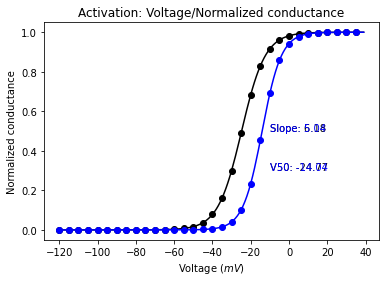

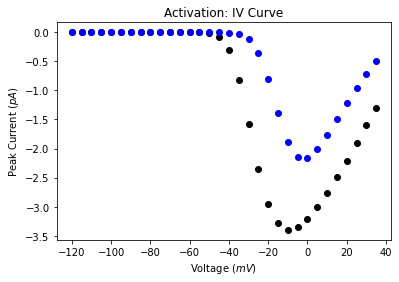

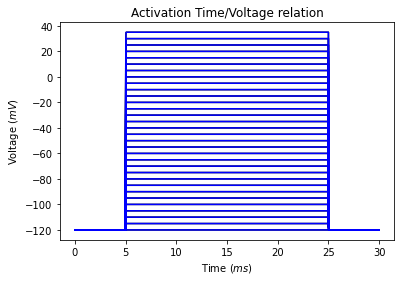

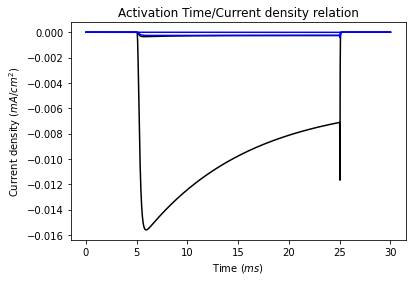

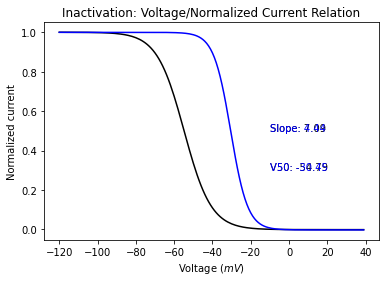

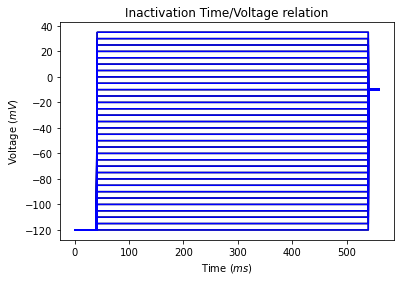

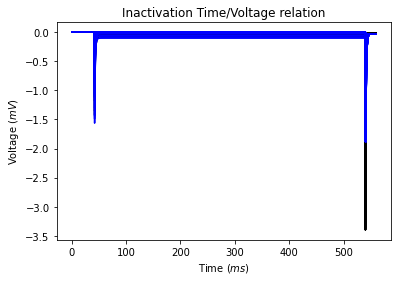

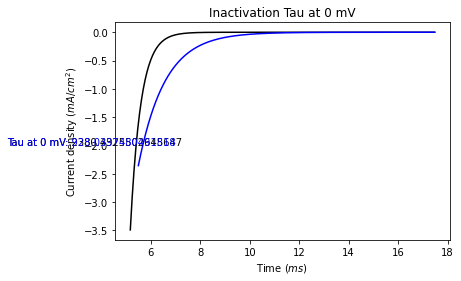

In [10]:
eh16.make_act_plots(new_par, filename = 'jinan_act.pdf')
eh16.make_inact_plots(new_par, filename = 'jinan_inact.pdf')

(actual, goal)
activation v half: (10.459999999999999, 10.59)
activation slope: (1.7071197411003238, 1.456)
(actual, goal)
inactivation v half: (18.759999999999998, 18.83)
inactivation slope: (0.6713681241184767, 1.31)
tau: (0.6811032380935246, 0.18)
persistent current: (1.9861912612687758, 2.0)


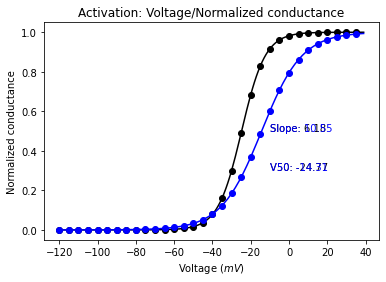

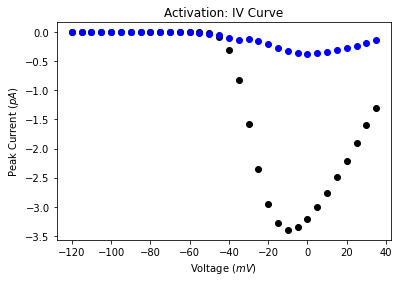

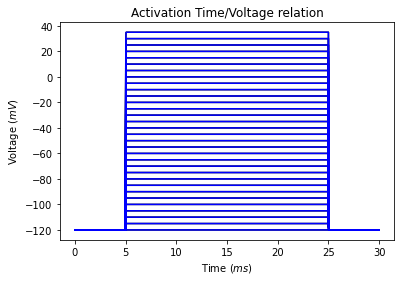

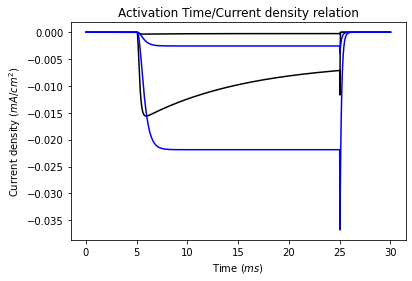

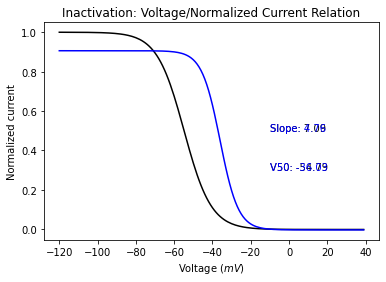

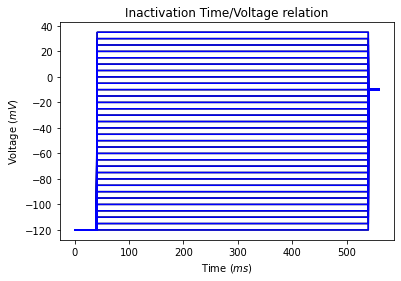

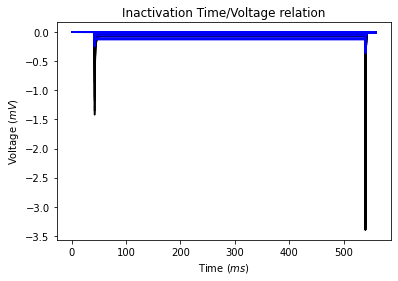

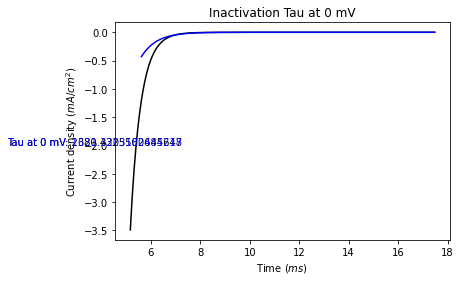

In [14]:
new_par = par97
eh16.make_act_plots(new_par, filename = 'jinan_act.pdf')
eh16.make_inact_plots(new_par, filename = 'jinan_inact.pdf')

In [13]:
eh16.make_params_dict(new_par)

{'sh_na16': 29.37455303390747,
 'tha_na16': -57.73385584119139,
 'qa_na16': 11.891550446498853,
 'Ra_na16': 0.7034480970709812,
 'Rb_na16': 0.7458471676703804,
 'thi1_na16': -76.54492828977375,
 'thi2_na16': -4.360135868594882,
 'qd_na16': 1.0753187187691573,
 'qg_na16': 7.743820332718601,
 'mmin_na16': 0.4342886254656672,
 'hmin_na16': 0.42061600443361485,
 'q10_na16': 1.8527146017814786,
 'Rg_na16': 0.17671265620260843,
 'Rd_na16': 0.04089488556627415,
 'thinf_na16': -37.52777117761381,
 'qinf_na16': 4.1662221609375685,
 'vhalfs_na16': -104.4691271236539,
 'a0s_na16': 0.05585446125335954,
 'zetas_na16': 29.571131958843388,
 'gms_na16': 2.5137334884656872,
 'smax_na16': 56.76570675176218,
 'vvh_na16': -116.41680866340164,
 'vvs_na16': -6.558415415201545,
 'Ena_na16': 48.5320376591091}

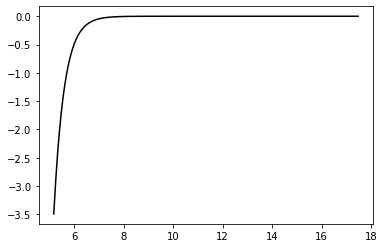

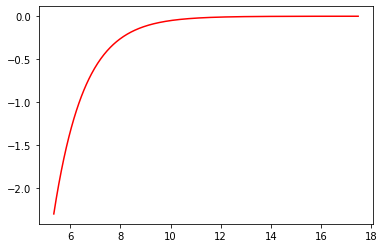

820.675050603415 2380.4325502645647
0.34475879205743676


In [7]:
eh16.set_param(eh16.wt_params)
tau_wt = eh16.find_tau0(make_plot = True, color = "black")
eh16.set_param(new_par)
tau_mut = eh16.find_tau0(make_plot = True, color = "red")
print(tau_mut, tau_wt)
print(tau_mut/tau_wt)

In [6]:
ramp = ggsd.Ramp(channel_name = 'na16')

In [7]:
ramp.genRamp()
ramp.persistentCurrent()

0.0006124895869023602

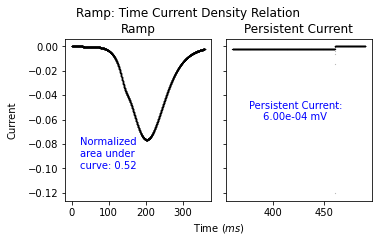

In [8]:
ramp.plotRamp_TimeCurrentRelation()

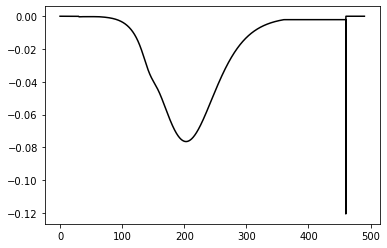

In [9]:
plt.plot(ramp.t_vec[1:], ramp.i_vec[1:], color='black')

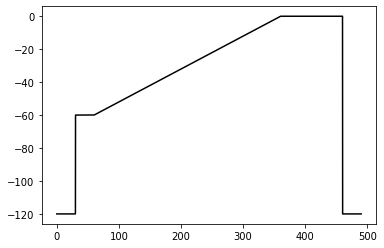

In [10]:
plt.plot(ramp.t_vec, ramp.v_vec, color='black')

In [11]:
t = ramp.t_vec
v = ramp.v_vec

In [12]:
len(t)

19600

In [13]:
new_result = list(v[:len(v)//2]) + list([cur for cur in v[len(v)//2:] if cur > -110])

In [14]:
len(new_result)

18400

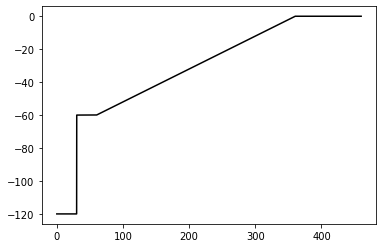

In [15]:
plt.plot(ramp.t_vec[:len(new_result)], new_result, color='black')

In [16]:
time_interval_1 = len([cur for cur in t if cur <= 10])

In [17]:
temp = new_result[:len1]
first = sum(temp)/len(temp)

NameError: name 'len1' is not defined

In [ ]:
first

In [ ]:
plt.plot(ramp.t_vec[:len(new_result)], new_result, color='black')